In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### for EDA, we dont need some columns and hence we will remove them

we remove Country column because all the data is for the same country i.e. United States

In [5]:
df.drop(['Row ID', 'Order ID','Ship Date', 'Customer ID','Country', 'Postal Code','Product ID', 'Sub-Category'], axis=1, inplace=True)
df.head()

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Product Name,Sales
0,08/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680


sort the dates (for forecasting later)

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df = df.sort_values(by='Order Date')
df.head()
#df.tail()

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Product Name,Sales
7980,2015-01-03,Standard Class,Darren Powers,Consumer,Houston,Texas,Central,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,2015-01-04,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,GBC Standard Plastic Binding Systems Combs,3.540
740,2015-01-04,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,SAFCO Boltless Steel Shelving,272.736
739,2015-01-04,Standard Class,Phillina Ober,Home Office,Naperville,Illinois,Central,Office Supplies,Avery 508,11.784
1759,2015-01-05,Standard Class,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536


In [7]:
df.isna().sum()

Order Date       0
Ship Mode        0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Category         0
Product Name     0
Sales            0
dtype: int64

the section below shows the distribution of sales column i.e. how much sales have varied in the span of four years              (most and least expensive sale, average value of sales)

In [8]:
df.describe()

,Order Date,Sales
count,9800,9800.000000
mean,2017-05-01 05:13:51.673469440,230.769059
min,2015-01-03 00:00:00,0.444000
25%,2016-05-24 00:00:00,17.248000
50%,2017-06-26 00:00:00,54.490000
75%,2018-05-15 00:00:00,210.605000
max,2018-12-30 00:00:00,22638.480000
std,NaN,626.651875


C:\aanacoonda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


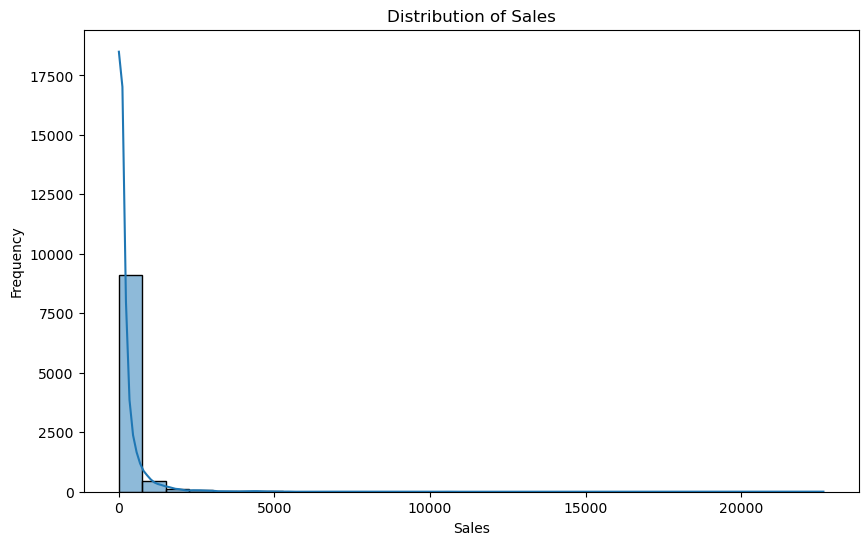

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

here it shows the average value of sales is around 230 dollars.
the most expensive purchase by any customer was of 22,638 dollars while the cheapest purchase was of around 44 cents.

In [10]:
df['Year'] = df['Order Date'].dt.year
df.sample(5)

,Order Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Product Name,Sales,Year
9736,2016-06-29,Standard Class,Neil Französisch,Home Office,Omaha,Nebraska,Central,Technology,Cisco 8x8 Inc. 6753i IP Business Phone System,269.980,2016
2837,2018-11-11,Standard Class,Guy Armstrong,Consumer,Los Angeles,California,West,Office Supplies,Ibico Plastic Spiral Binding Combs,121.600,2018
2485,2018-08-28,Standard Class,Kristina Nunn,Home Office,Seattle,Washington,West,Office Supplies,Newell 344,5.560,2018
1698,2016-12-27,Standard Class,Arthur Gainer,Consumer,Los Angeles,California,West,Office Supplies,Avery 497,21.560,2016
4233,2018-07-05,Standard Class,Linda Southworth,Corporate,Dallas,Texas,Central,Office Supplies,Tuf-Vin Binders,6.316,2018


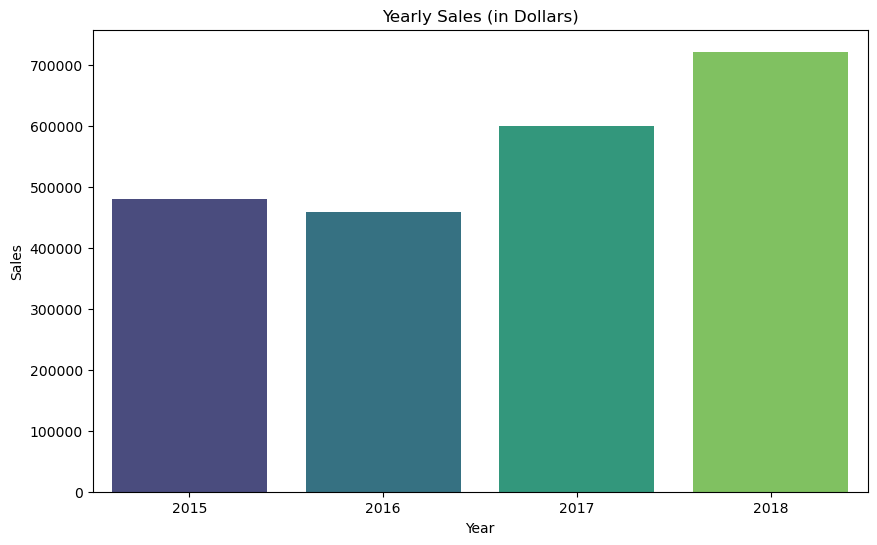

In [11]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', data=yearly_sales, palette='viridis')
plt.title('Yearly Sales (in Dollars)')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

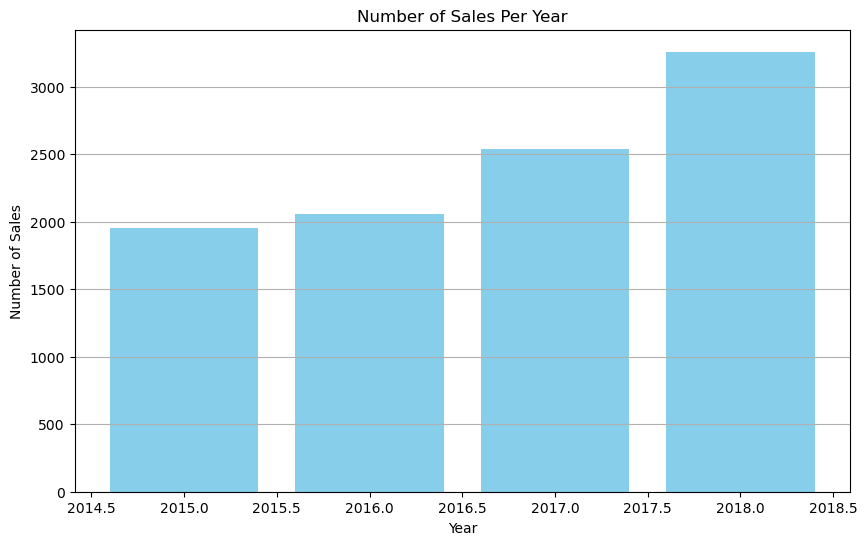

In [12]:
yearly_sales_count = df['Year'].value_counts().sort_index().reset_index()
yearly_sales_count.columns = ['Year', 'Number of Sales']
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales_count['Year'], yearly_sales_count['Number of Sales'], color='skyblue')
plt.title('Number of Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.grid(axis='y')
plt.show()

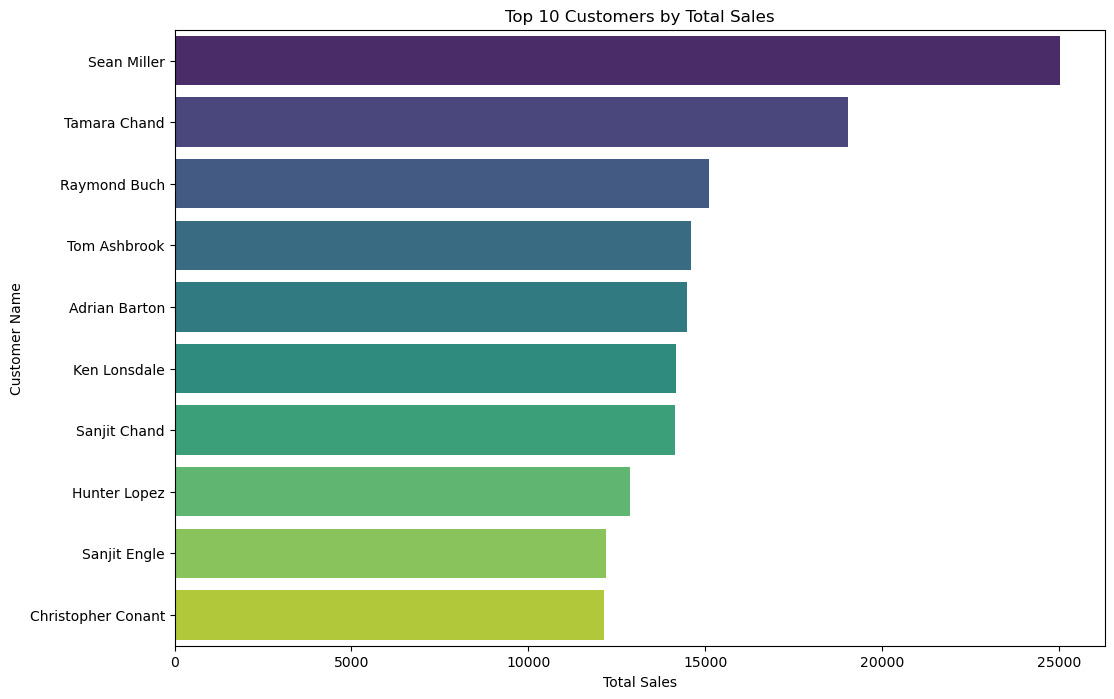

In [13]:
customer_sales = df.groupby('Customer Name')['Sales'].sum().reset_index()
top_10_customers = customer_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Customer Name', data=top_10_customers, palette='viridis')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()

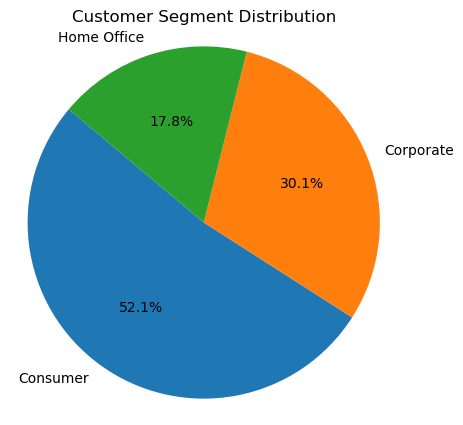

In [14]:
segment_counts = df['Segment'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Customer Segment Distribution')
plt.axis('equal')
plt.show()

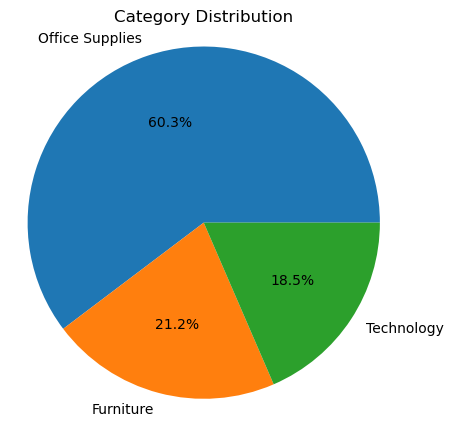

In [15]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.axis('equal')
plt.show()

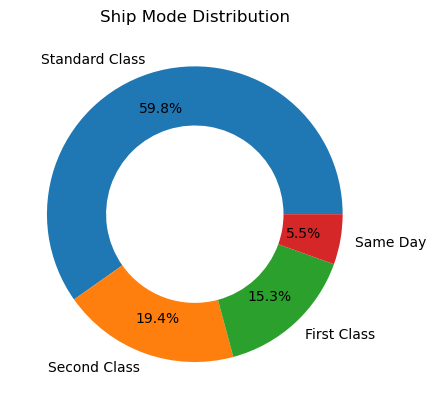

In [16]:
ship_mode_counts = df['Ship Mode'].value_counts()

plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%',pctdistance=0.75, wedgeprops=dict(width=0.4))
plt.title('Ship Mode Distribution')
#plt.axis('equal')
plt.show()

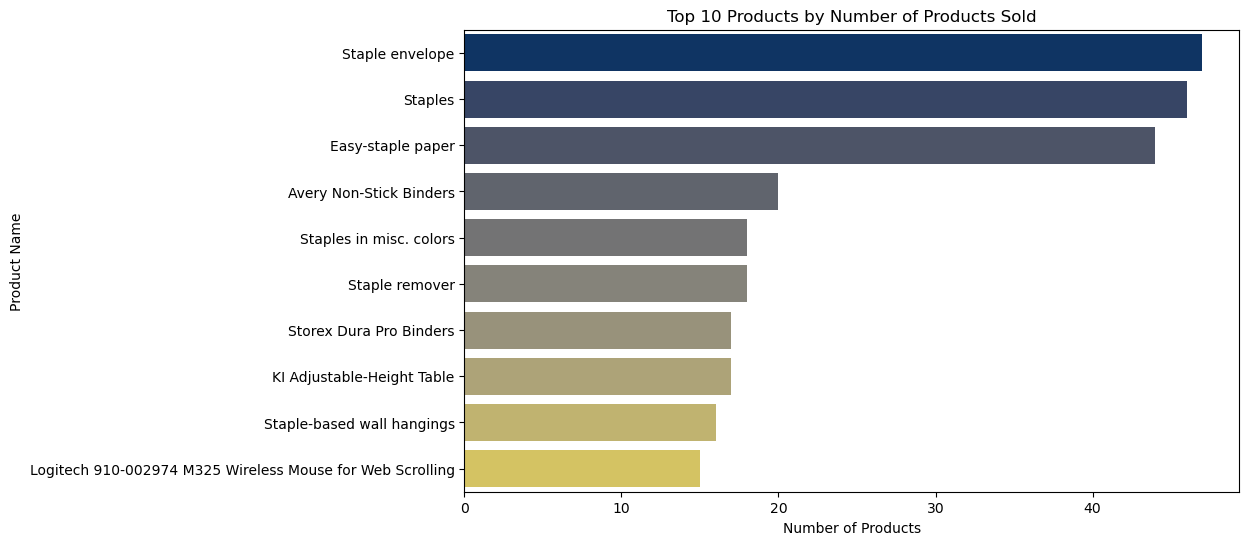

In [17]:
product_counts = df['Product Name'].value_counts().reset_index()
product_counts.columns = ['Product Name', 'Count']
top_10_products = product_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Product Name', data=top_10_products, palette='cividis')
plt.xlabel('Number of Products')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Number of Products Sold')
plt.show()

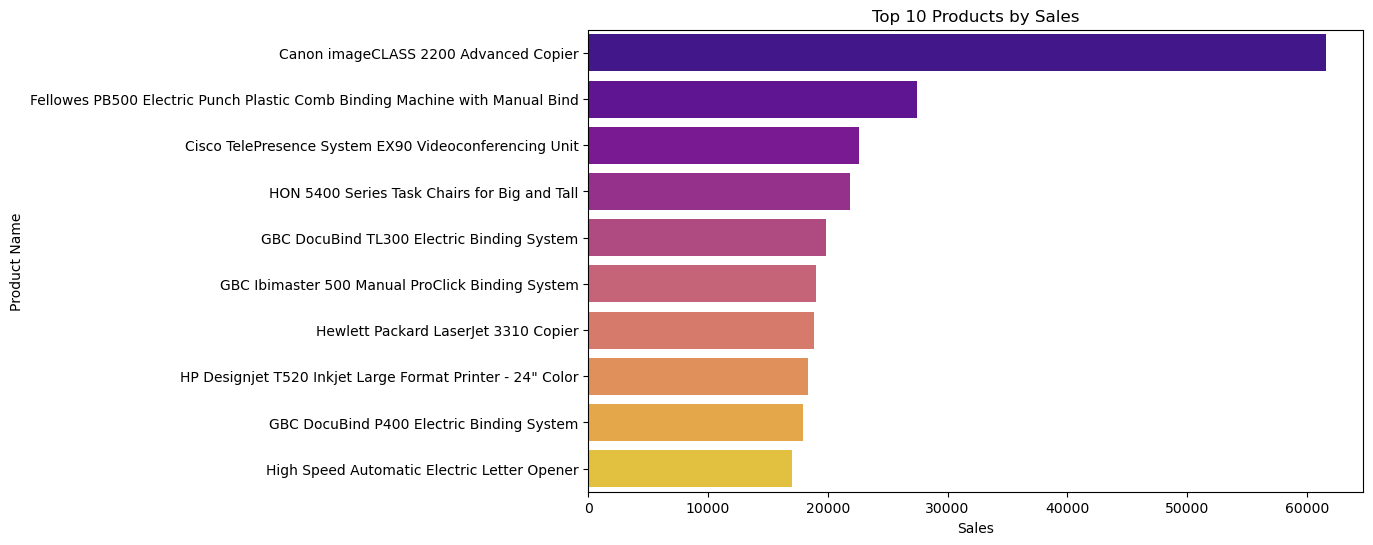

In [18]:
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()
top_10_products = product_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Product Name', data=top_10_products, palette='plasma')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Sales')
plt.show()

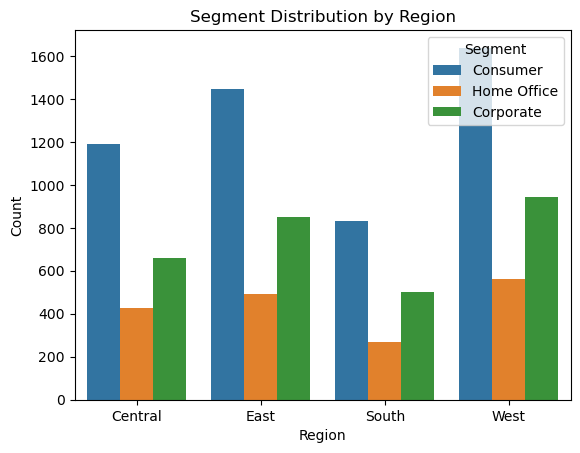

In [19]:
sns.countplot(x='Region', hue='Segment', data=df)
plt.title('Segment Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Segment', loc='upper right')
plt.show()

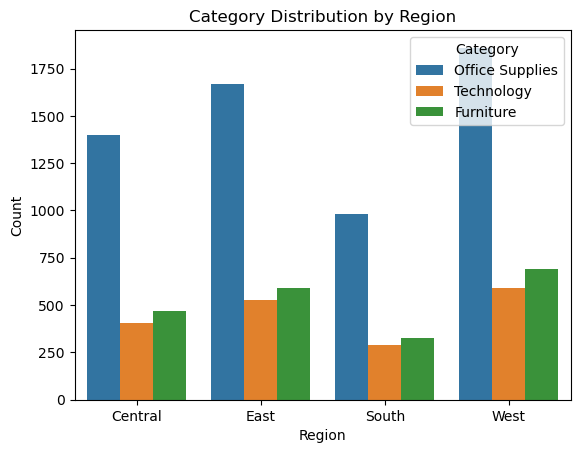

In [20]:
sns.countplot(x='Region', hue='Category', data=df)
plt.title('Category Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Category', loc='upper right')
plt.show()

The distribution of category of products and segment of customers over the regions of United States show us what type of customers are interested in purchasing what kind of products residing in different regions. It can help the store decide the management of inventories throughout the country and lower the transportation costs. Some observations are:

1. Customers from each region have purchased more office supplies than from technology and furniture.
2. Consumer segment holds the largest amount of sales over corporate and home office.
3. Products coming under Office supplies category have the more expensive items. 

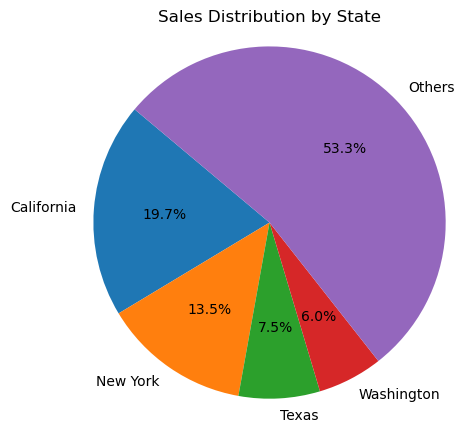

In [25]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()

top_4_states = state_sales.sort_values(by='Sales', ascending=False).head(4)

# Calculate the sales for "Others"
others_sales = state_sales.sort_values(by='Sales', ascending=False).iloc[4:]['Sales'].sum()

# Create a DataFrame for "Others"
others_df = pd.DataFrame({'State': ['Others'], 'Sales': [others_sales]})

# Concatenate the top 4 states with the "Others" row
top_states_combined = pd.concat([top_4_states, others_df], ignore_index=True)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_states_combined['Sales'], labels=top_states_combined['State'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by State')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11678.1300
3,California,446306.4635
4,Colorado,31841.5980
5,Connecticut,13384.3570
6,Delaware,27322.9990
7,District of Columbia,2865.0200
8,Florida,88436.5320
9,Georgia,48219.1100
